# Exercise 4. Improving Image Quality

### Import Liberaries

In [1]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

### Read Origianl Images

In [2]:
imgs = [cv2.imread("StLouisArchMultExpCDR.jpg", cv2.IMREAD_UNCHANGED).astype("float64"),
        cv2.imread("StLouisArchMultExpEV+1.51.jpg", cv2.IMREAD_UNCHANGED).astype("float64"),
        cv2.imread("StLouisArchMultExpEV+4.09.jpg", cv2.IMREAD_UNCHANGED).astype("float64"),
        cv2.imread("StLouisArchMultExpEV-1.82.jpg", cv2.IMREAD_UNCHANGED).astype("float64"),
        cv2.imread("StLouisArchMultExpEV-4.72.jpg", cv2.IMREAD_UNCHANGED).astype("float64")]

### Processing the first method and showing the result

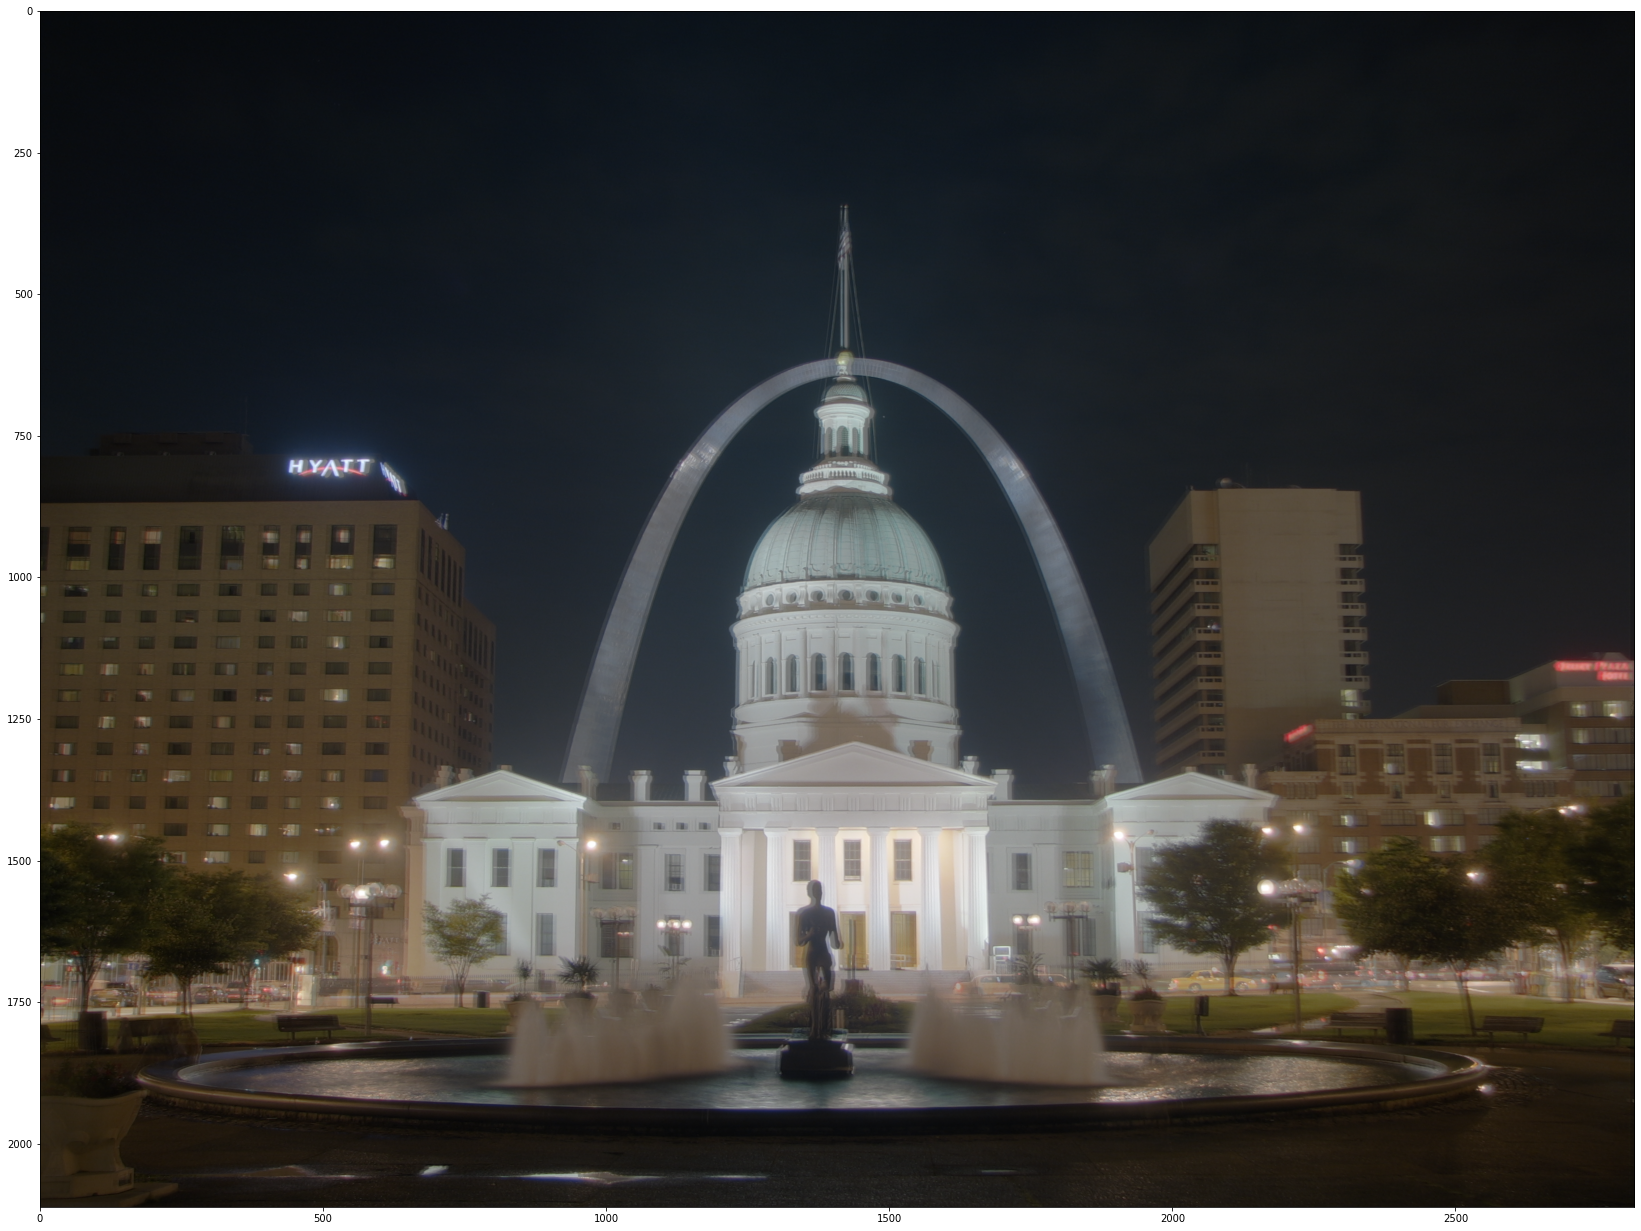

In [3]:
img1 = np.mean(imgs, dtype=np.float64, axis=0)
img1 = cv2.cvtColor(img1.astype("uint8"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(29, 22))
plt.imshow(img1)
plt.show()

### Calculating Wavelet Transform for each Image and Channel

In [4]:
cA = np.empty((5, 3), dtype=object)
cH = np.empty((5, 3), dtype=object)
cV = np.empty((5, 3), dtype=object)
cD = np.empty((5, 3), dtype=object)

for i in range(5):
    for j in range(3):
        cA[i][j], (cH[i][j], cV[i][j], cD[i][j]) = pywt.dwt2(imgs[i][:, :, j], 'haar')

### Calculating mean for LL and max for Other parts

In [5]:
CA = np.empty(3, dtype=object)
CH = np.empty(3, dtype=object)
CV = np.empty(3, dtype=object)
CD = np.empty(3, dtype=object)

for i in range(3):
    CA[i] = np.mean(cA[:, i].tolist(), dtype=np.float64, axis=0)
    CH[i] = np.max(cH[:, i].tolist(), axis=0)
    CV[i] = np.max(cV[:, i].tolist(), axis=0)
    CD[i] = np.max(cD[:, i].tolist(), axis=0)

### Applying Inverse of the Transform

In [6]:
img2 = np.copy(img1)
for i in range(3):
    img2[:, :, i] = pywt.idwt2((CA[i], (CH[i], CV[i], CD[i])), 'haar')

### Showing the Result

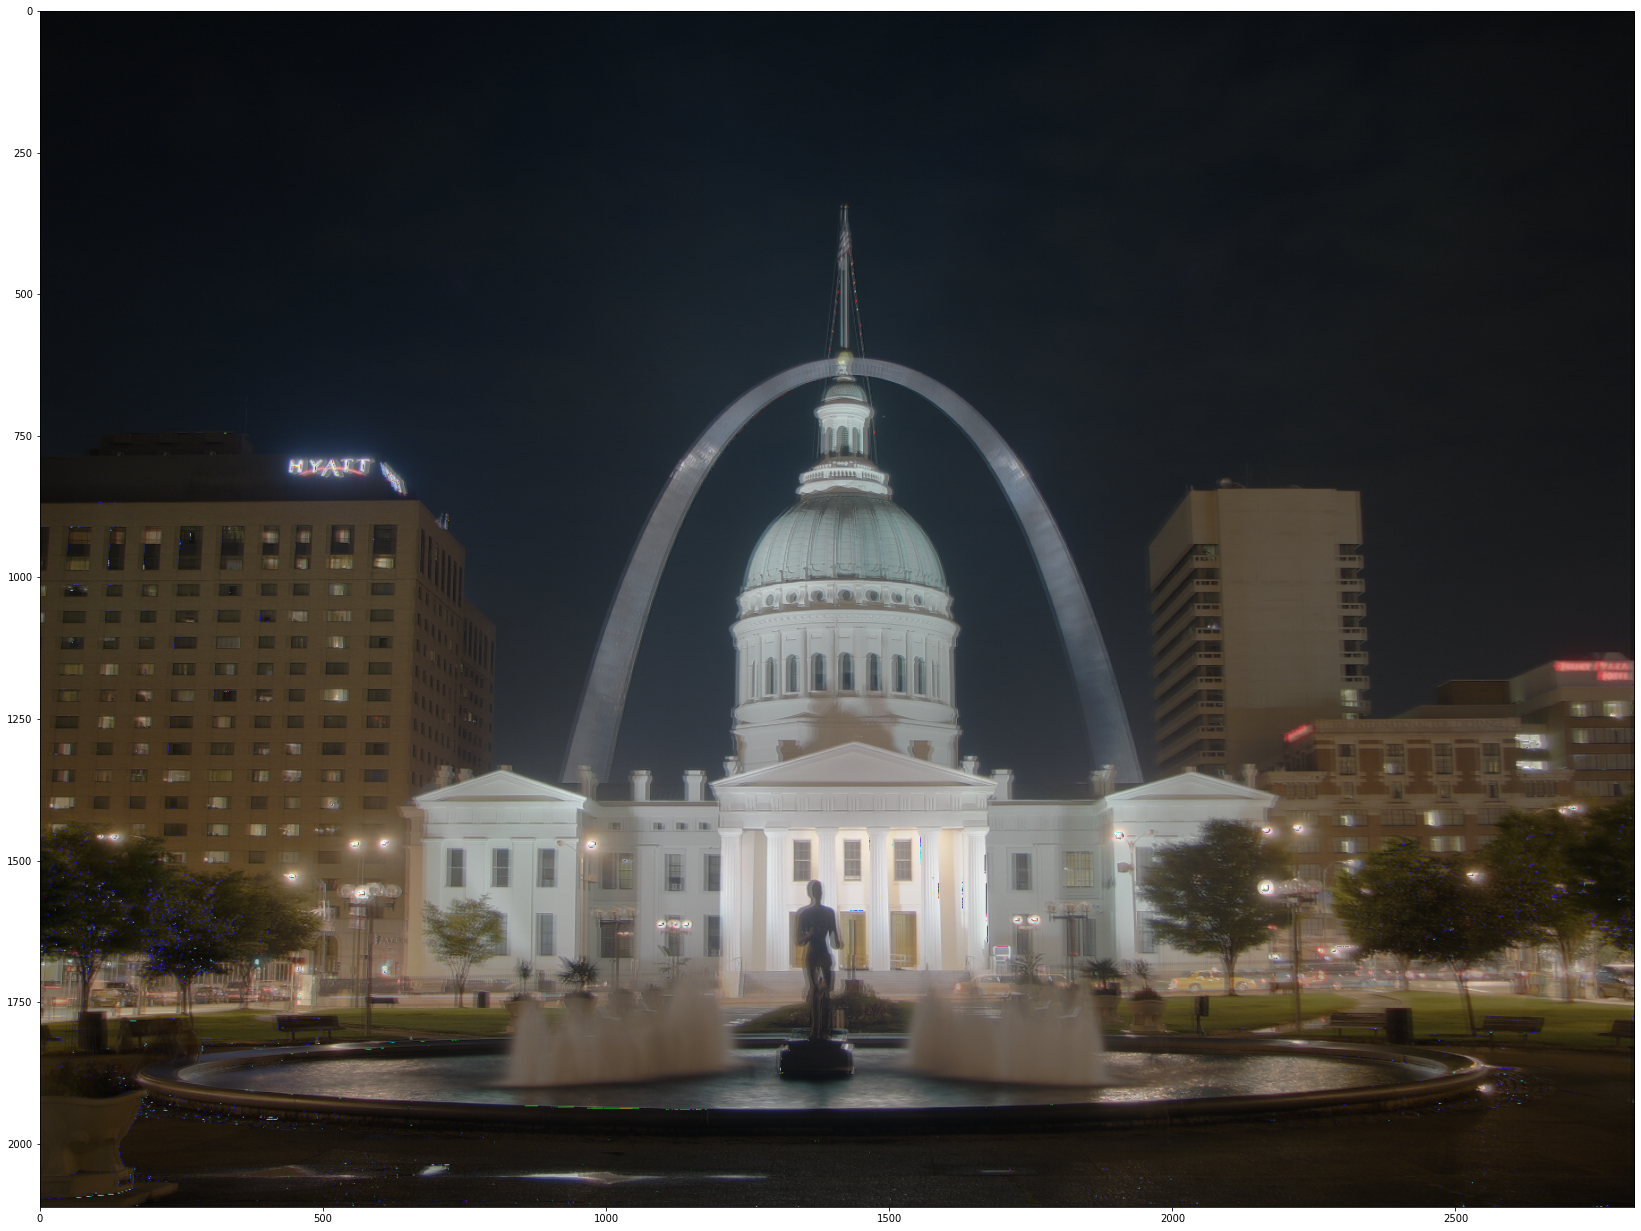

In [7]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(29, 22))
plt.imshow(img2)
plt.show()

#### If we compare these two Images with the first original image we can see that the quality of images not only not improved but also are reduced.
#### And when we look at the second method's result carefully we can detect some pixels with abnormal values which could be due to inaccuracy of calculation steps